In [1]:
import io, os, sys, types

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
import sys
import pygame
import random
from pygame.locals import *

import tensorflow
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import time
import sys
%matplotlib inline
import random
import copy

random.seed(a=0)

class GeneticPool(object):
    def __init__(
        self, 
        populationSize = 10, 
        mutationRate = 0.1, 
        ins = None,
        outs = None):

        self.populationSize = populationSize
        self.mutationRate = mutationRate
        self.poolLR = [0.001, 0.5]
        self.poolInputNeurons = [8,12,16,20,24]
        self.poolHiddenLayer = [1.5,2,2.5]
        
    def generatePopulation(self):
        self.chromosomes = []
        for _ in range(self.populationSize):
            c = self.generateChromosome()
            self.chromosomes += [c]
                      
    def generateChromosome(self):
        class Chromosome:
            LR = random.uniform(self.poolLR[0], self.poolLR[1])
            InputNeurons = self.poolInputNeurons[random.randint(1,len(self.poolInputNeurons))-1]          
            HiddenLayer = self.poolHiddenLayer[random.randint(1,len(self.poolHiddenLayer))-1]
            Error = 0
            pesoEnt = []
            pesoSal = []
            Graph = []
        chromosome = Chromosome() 
        return chromosome
    

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class BackPropagation:
    def __init__(self, iterations, LR, neurons, window_size, prediction_size, train_size):
        #esto es importante porque hay ocasiones reconoce los parámetros de entrada como floats
        neurons = int(neurons)
        window_size = int(window_size)
        #########################################################
        dat = pd.read_excel("1999-2018.xls", one_hot=True)
        data = (dat["Average"])
        data = np.array(data)/np.max(data)
        data_size = (data.size)
        validate_size = data_size - train_size
        #########################################################
        a_0 = tf.placeholder(tf.float32, [1, window_size])
        y = tf.placeholder(tf.float32, [1, prediction_size])
        w_1 = tf.Variable(tf.truncated_normal([window_size, neurons]))
        w_2 = tf.Variable(tf.truncated_normal([neurons, prediction_size]))
        ##########################################################
        def sigma(x):
            return tf.div(tf.constant(1.0),
                          tf.add(tf.constant(1.0), tf.exp(tf.negative(x))))

        def sigmaprime(x):
            return tf.multiply(sigma(x), tf.subtract(tf.constant(1.0), sigma(x)))

        ##############################################################
        z_1 = tf.matmul(a_0, w_1)
        a_1 = sigma(z_1)
        z_2 = tf.matmul(a_1, w_2)
        a_2 = sigma(z_2)
        diff = tf.subtract(a_2, y)
        ###############################################################
        d_z_2 = tf.multiply(diff, sigmaprime(z_2))
        d_b_2 = d_z_2
        d_w_2 = tf.matmul(tf.transpose(a_1), d_z_2)
        d_a_1 = tf.matmul(d_z_2, tf.transpose(w_2))
        d_z_1 = tf.multiply(d_a_1, sigmaprime(z_1))
        d_b_1 = d_z_1
        d_w_1 = tf.matmul(tf.transpose(a_0), d_z_1)
        ###############################################################
        eta = tf.constant(LR)
        cost = tf.multiply(diff, diff)
        cost = tf.sqrt(cost)
        #step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
        step = [
            tf.assign(w_1, tf.subtract(w_1, tf.multiply(eta, d_w_1))), 
            tf.assign(w_2, tf.subtract(w_2, tf.multiply(eta, d_w_2)))
        ]
        sess = tf.InteractiveSession()
        sess.run(tf.global_variables_initializer())
        df = pd.DataFrame(columns=['error'])
        comp1=0
        ##############################################################################################
        for i in range(iterations):
            error_final = 0
            for j in range ((train_size - prediction_size) - window_size):
                batch_xs = (data[j: j+window_size])
                batch_ys = (data[j+window_size ])
                batch_xs = np.reshape(batch_xs,(1,window_size))
                batch_ys = np.reshape(batch_ys,(1,1))
                sess.run([step,cost], feed_dict = {a_0: batch_xs, y : batch_ys})
            for j in range (12):
                ss = 12
                batch_xs = (data[train_size - window_size +j: train_size +j])
                batch_ys = (data[train_size + j])
                batch_xs = np.reshape(batch_xs,(1,window_size))
                batch_ys = np.reshape(batch_ys,(1,1))
                error,rediff,w1,w2 = sess.run([cost,a_2,w_1,w_2], feed_dict = {a_0: batch_xs, y : batch_ys})
                error_final += error[0][0]
            lis =[]
            for j in range(len(w2)):
                lis.append(w2[j][0])
            index = np.arange(len(lis))
            plt.figure(i)
            plt.bar(index,lis)
            plt.savefig('pesos.png')
            graficarPesos()
            pygame.display.update()
            #plt.show()
            plt.close()
            
            if(i==0):
                comp1=error_final/ss
                df = df.append({'error':comp1}, ignore_index=True)
                self.final_result = comp1
            else:
                if(comp1<error_final/ss and i != 1):
                    break
                else:
                    comp1=error_final/ss
                    df = df.append({'error':comp1}, ignore_index=True)
                    self.rediff = rediff
                    self.final_result = comp1
        self.resultado = df
        self.pesosEnt = w1
        self.pesosHid = w2
        sess.close()

In [3]:
def make_plot(lista, epoca, hijo):
    fig = plt.figure(figsize=(10,7))
    plt.plot(lista)
    plt.xlabel("Number of iterations", fontsize = 15)
    plt.ylabel("RMSE", fontsize = 15)
    titulo = "Epoch " + str(epoca) + ", hijo " + str(hijo)
    plt.title(titulo, fontsize = 15)
    fig.savefig('plotprueba.png')


In [4]:
def make_plot2(lista):
    fig = plt.figure(figsize=(10,7))
    plt.plot(lista)
    plt.xlabel("Years", fontsize = 15)
    plt.ylabel("Prediction", fontsize = 15)
    plt.title("Prediction vs. Real", fontsize = 15)
    fig.savefig('plotprueba.png')


In [5]:
def StartGenetic():
    a = GeneticPool()
    a.generatePopulation()
    listIndex = []
    for i in range (len(a.chromosomes)):
        b = BackPropagation (20,a.chromosomes[i].LR,int(a.chromosomes[i].HiddenLayer*(a.chromosomes[i].InputNeurons)), int(a.chromosomes[i].InputNeurons), 1, 216)
        #b.resultado.plot()
        a.chromosomes[i].Error = b.final_result
        a.chromosomes[i].Graph = b.resultado
    return a.chromosomes

def Fitness(num, obj):
    listIndex = []   
    for i in range (len(obj)):
        if i == 0:
            listIndex = [i]
        elif len(listIndex) <= num -1 :
            if obj[listIndex[len(listIndex)-1]].Error <= obj[i].Error:
                listIndex.append(i)
            else :
                for j in range (len(listIndex),-1,-1):
                    if j == 0:
                        listIndex.insert(0,i)
                        break
                        
                    elif obj[listIndex[j-1]].Error <= obj[i].Error:
                        listIndex.insert(j,i)
                        break
        else :
            if obj[listIndex[len(listIndex)-1]].Error >= obj[i].Error:
                for j in range (len(listIndex),-1,-1):
                    if j == 0:
                        listIndex.insert(0,i)
                        listIndex.pop()
                        break
                        
                    elif obj[listIndex[j-1]].Error <= obj[i].Error:
                        listIndex.insert(j,i)  
                        listIndex.pop()
                        break
    matingPool = []
    for i in listIndex:
        matingPool.append(obj[i])
    return matingPool
        
        
        

In [6]:
def swap(w1,w2):
    children = copy.deepcopy(w1)
    r = random.randint(0,1)
    if r == 0:
        children.HiddenLayer = w2.HiddenLayer
    else :
        children.LR = w2.LR
        children.InputNeurons = w2.InputNeurons
    return children

def CrossOver(matingPool,population):
    
    percentage = []
    total_error = 0
    suma = 0
    roulette = []
    newGeneration = []
    
    for i in matingPool:
        percentage.append(1/i.Error)
        total_error += 1/i.Error
    for i in range(len(matingPool)):
        percentage[i] = round((percentage[i]/total_error)*100)
    
    for i in percentage:
        suma += i
    
    if suma > 100:
        percentage[len(percentage)-1] -= suma - 100
    
    elif suma < 100:
        percentage[0] += 100 - suma

    
    var = 0
    for i in percentage:
        for j in range (int(i)):
            roulette.append(matingPool[var])
        var += 1
    
    for i in range(population):
        winner1 = random.randint(0,len(roulette)-1)
        winner2 = winner1
        while (winner2 == winner1):
            winner2 = random.randint(0,len(roulette)-1)
        newGeneration.append(swap(roulette[winner1],roulette[winner2]))
    return newGeneration

    
    

In [7]:
class ValidateBP:
    def __init__(self, iteraciones, LR, neurons, window_size, dataRetoque, dataSalida, pesoEntrada, pesoEscondido, training):
        iterations = iteraciones
        LR = LR
        neurons = int(neurons)
        window_size = int(window_size)
        pesoEnt = pesoEntrada
        pesoHid = pesoEscondido
        dataRetoque = dataRetoque
        dataSalida = dataSalida
        training =  training

        #########################################################
        a_0 = tf.placeholder(tf.float32, [1, window_size])
        y = tf.placeholder(tf.float32, [1, 1])
        w_1 =  tf.Variable(pesoEntrada)
        w_2 =  tf.Variable(pesoEscondido)
        ##########################################################
        def sigma(x):
            return tf.div(tf.constant(1.0),
                          tf.add(tf.constant(1.0), tf.exp(tf.negative(x))))

        def sigmaprime(x):
            return tf.multiply(sigma(x), tf.subtract(tf.constant(1.0), sigma(x)))

        ##############################################################
        z_1 = tf.matmul(a_0, w_1)
        a_1 = sigma(z_1)
        z_2 = tf.matmul(a_1, w_2)
        a_2 = sigma(z_2)
        diff = tf.subtract(a_2, y)
        ###############################################################
        d_z_2 = tf.multiply(diff, sigmaprime(z_2))
        d_b_2 = d_z_2
        d_w_2 = tf.matmul(tf.transpose(a_1), d_z_2)
        d_a_1 = tf.matmul(d_z_2, tf.transpose(w_2))
        d_z_1 = tf.multiply(d_a_1, sigmaprime(z_1))
        d_b_1 = d_z_1
        d_w_1 = tf.matmul(tf.transpose(a_0), d_z_1)
        ###############################################################
        eta = tf.constant(LR)
        cost = tf.multiply(diff, diff)
        cost = tf.sqrt(cost)
        #step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
        step = [
            tf.assign(w_1,
                    tf.subtract(w_1, tf.multiply(eta, d_w_1)))
          , tf.assign(w_2,
                    tf.subtract(w_2, tf.multiply(eta, d_w_2)))
        ]
        sess = tf.InteractiveSession()
        sess.run(tf.global_variables_initializer())
        df = pd.DataFrame(columns=['error'])
        comp1=0
        ##############################################################################################
        if (training):
            for i in range(iterations):
                error_final = 0
                batch_xs = dataRetoque
                batch_ys = dataSalida
                batch_xs = np.reshape(batch_xs,(1,window_size))
                batch_ys = np.reshape(batch_ys,(1,1))
                a,w1,w2 = sess.run([step,w_1,w_2], feed_dict = {a_0: batch_xs, y : batch_ys})
                pesoEntrada = w_1
                pesoEscondido = w_2
                lis =[]
                for j in range(len(w2)):
                    lis.append(w2[j][0])
                index = np.arange(len(lis))
                plt.figure(i)
                plt.bar(index,lis)
                plt.savefig('pesos.png')
                graficarPesos()
                pygame.display.update()
                #plt.show()
                plt.close()
            self.pesoEntrada = pesoEntrada.eval()
            self.pesoEscondido = pesoEscondido.eval()
        else:
            error_final = 0
            batch_xs = dataRetoque
            batch_ys = dataSalida
            batch_xs = np.reshape(batch_xs,(1,window_size))
            batch_ys = np.reshape(batch_ys,(1,1))
            a = sess.run([a_2], feed_dict = {a_0: batch_xs, y : batch_ys})
            self.salida = a
        sess.close()

In [8]:
def  llenarData(pesoEntrada2,pesoEscondido2, LR, window, neurons):
    pesoEntrada = tf.Variable(pesoEntrada2)
    pesoEscondido = tf.Variable(pesoEscondido2)
    data = pd.read_excel("4years-2013-2017.xls", one_hot=True)
    data = (data["Average"])
    data = np.array(data)/np.max(data)
    data = data[(62-(window+1)):]
    print("Esto es data", data)
    valores = []
    valoresVer =[]
    for i in range(9):
        print(i)
        dataRetoque = data[i:i+window]
        dataSalida = data[i+window]
        newBP =ValidateBP(1,LR, window*neurons, window, dataRetoque, dataSalida, pesoEntrada, pesoEscondido, True)
        pesoEntrada=newBP.pesoEntrada
        pesoEscondido=newBP.pesoEscondido
        dataRetoque = data[i+1:i+window+1]
        dataSalida = data[i+window+1]
        salida = ValidateBP(0,LR, window*neurons, window, dataRetoque, dataSalida, pesoEntrada, pesoEscondido, False).salida
        valores.append(salida[0][0][0])
        valoresVer.append(dataSalida)
    return valores, valoresVer

In [9]:
def graficar():
    image1 = pygame.image.load('plotprueba.png')
    image1 = pygame.transform.scale(image1,(700,500))
    screen.blit(image1,(700,200))

    #image2 = pygame.image.load('peso'+str(cont)+'.png')
    #image2 = pygame.transform.scale(image2,(700,500))
    #screen.blit(image2,(950,120))
    
    
def graficarPesos():
    image1 = pygame.image.load('pesos.png')
    image1 = pygame.transform.scale(image1,(500,500))
    screen.blit(image1,(50,200))

    #image2 = pygame.image.load('peso'+str(cont)+'.png')
    #image2 = pygame.transform.scale(image2,(700,500))
    #screen.blit(image2,(950,120))

In [10]:
size = width, height = 1400, 700
black = 0, 0, 0
fondo = ( 242, 244, 244 )
color = (0,255,255)
pygame.init()
screen = pygame.display.set_mode(size)
pygame.display.set_caption('Hola')

error = 1

fuente1 = pygame.font.Font(None,80)
fuente2 = pygame.font.Font(None,75)
texto1 = fuente1.render('Backpropagation with genetic algorithm',0,( 192, 57, 43 ))
texto2 = fuente2.render('Weights',0,( 142, 68, 173 ))
screen.fill(fondo)
for event in pygame.event.get():
    if event.type == QUIT:
        pygame.quit()
        sys.exit()
screen.blit(texto1,(200,10))
screen.blit(texto2,(200,100))


def main ():
    x = StartGenetic()
    b = Fitness(5,x)
    fg=x
    #z = CrossOver(b,5)
    for epocas in range (3):
        z = CrossOver(b,10)
        cnt = 1
        for i in z:
            print ("Epoca",epocas)
            er = BackPropagation(250,i.LR,int(i.HiddenLayer*(i.InputNeurons)),int(i.InputNeurons),1,216)
            i.Error = er.final_result
            i.pesoEnt = er.pesosEnt
            i.pesoSal = er.pesosHid
            i.Graph = er.resultado
            pygame.draw.rect(screen, fondo, (500,100,1000,100))
            texto3 = fuente2.render('Error = '+str(er.final_result),0,( 230, 126, 34 ))
            screen.blit(texto3,(500,100))
            print("El hijo numero", cnt, "con error final de ", er.final_result)
            make_plot(er.resultado, epocas, cnt)
            cnt += 1
            graficar()
            #graficarPesos()
            pygame.display.update()
        b = Fitness(5,z)
        #b[0].Graph.plot()

        
    data_prediction, data_real  = llenarData(z[0].pesoEnt,z[0].pesoSal, z[0].LR, z[0].InputNeurons, z[0].HiddenLayer)
    data_prediction = pd.DataFrame({'Prediccion':data_prediction})
    data_real = pd.DataFrame({'Real':data_real})
    data = pd.read_excel("4years-2013-2017.xls", one_hot=True)
    data = (data["Average"])
    maxi = np.max(data)
    data_prediction = data_prediction * maxi
    data_real = data_real * maxi
    comparison = pd.concat([data_prediction,data_real], axis = 1)
    make_plot2(comparison)
    graficar()
    pygame.display.update()

Epoca 0
El hijo numero 1 con error final de  0.031143372257550556
Epoca 0
El hijo numero 2 con error final de  0.040900908410549164
Epoca 0
El hijo numero 3 con error final de  0.02394671489795049
Epoca 0
El hijo numero 4 con error final de  0.03216070681810379
Epoca 0
El hijo numero 5 con error final de  0.031845291455586754
Epoca 0
El hijo numero 6 con error final de  0.03178970764080683
Epoca 0
El hijo numero 7 con error final de  0.030043077965577442
Epoca 0
El hijo numero 8 con error final de  0.04955974966287613
Epoca 0
El hijo numero 9 con error final de  0.01609923193852107
Epoca 0
El hijo numero 10 con error final de  0.021399952471256256
Epoca 1
El hijo numero 1 con error final de  0.028752389053503673
Epoca 1
El hijo numero 2 con error final de  0.017372190952301025
Epoca 1
El hijo numero 3 con error final de  0.05935060977935791
Epoca 1
El hijo numero 4 con error final de  0.017611893514792126
Epoca 1
El hijo numero 5 con error final de  0.01641326646010081
Epoca 1
El hijo 

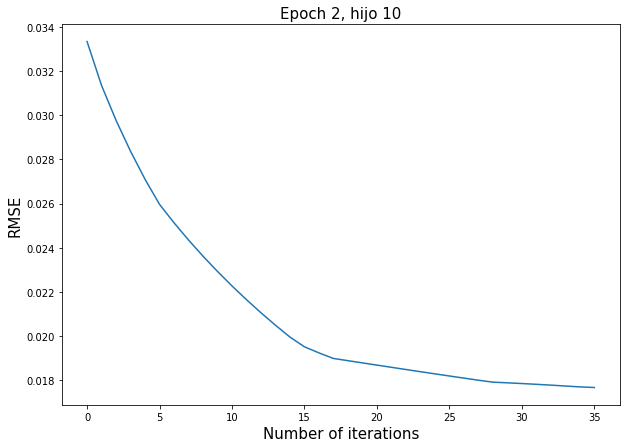

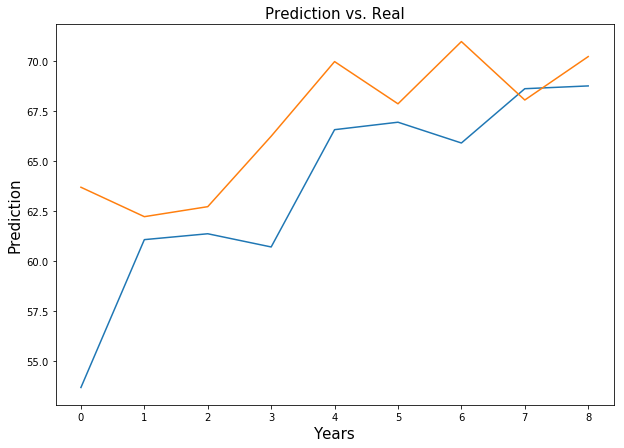

In [11]:
main()